In [1]:
import pickle
import os

FOLDER = os.getcwd() + "/45cell"

with open(FOLDER+'/ori.pkl', 'rb') as file:   
    ori = pickle.load(file)
with open(FOLDER+'/mask.pkl', 'rb') as file:   
    mask = pickle.load(file)
with open(FOLDER+'/out.pkl', 'rb') as file:   
    out = pickle.load(file)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [15, 5]
import math
import numpy as np

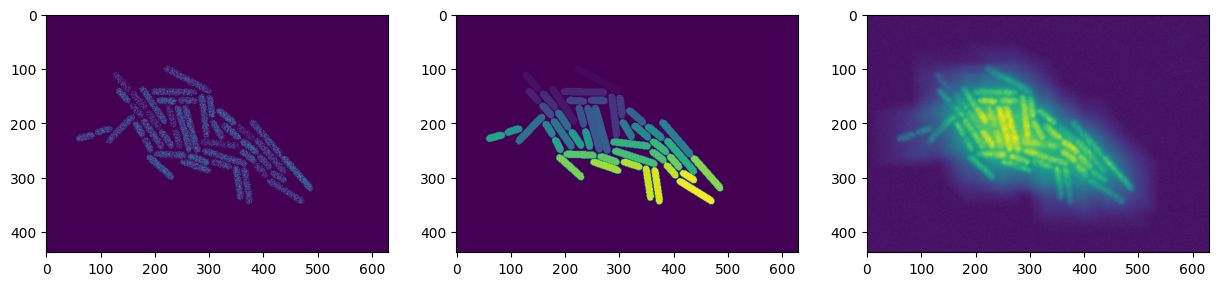

In [3]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(ori)
axarr[1].imshow(mask)
axarr[2].imshow(out)
plt.show()

In [4]:
#Final all mid points of cells

min_x = {}
max_x = {}
min_y = {}
max_y = {}

(maskWidth, maskHeight) = mask.shape
print(maskWidth, maskHeight)

for i in range(maskWidth):
    for j in range(maskHeight):
        #Add mask value to dictionaries
        if (not mask[i][j] in min_x.keys()):
            min_x[mask[i][j]] = math.inf
            max_x[mask[i][j]] = -1
            min_y[mask[i][j]] = math.inf
            max_y[mask[i][j]] = -1
        
        min_x[mask[i][j]] = min(min_x[mask[i][j]],i)
        max_x[mask[i][j]] = max(max_x[mask[i][j]],i)
        min_y[mask[i][j]] = min(min_y[mask[i][j]],j)
        max_y[mask[i][j]] = max(max_y[mask[i][j]],j)

midpt = {}

for k in min_x.keys():
    midpt[k] = ((min_x[k]+max_x[k])/2,(min_y[k]+max_y[k])/2)

del(midpt[0.0])
print(midpt)


438 630
{1.5259022e-05: (121.0, 261.0), 3.0518044e-05: (124.0, 139.0), 4.5777066e-05: (168.0, 197.5), 6.103609e-05: (150.5, 141.5), 7.629511e-05: (143.0, 235.0), 9.155413e-05: (158.5, 170.0), 0.00010681315: (187.5, 290.5), 0.00012207218: (170.0, 303.5), 0.0001373312: (159.0, 222.0), 0.00015259022: (158.5, 260.5), 0.00016784924: (177.0, 166.5), 0.00018310826: (187.5, 230.0), 0.00019836728: (210.5, 252.5), 0.0002136263: (211.5, 267.0), 0.00022888533: (188.5, 331.0), 0.00024414435: (194.5, 196.5), 0.00025940337: (211.5, 136.5), 0.0002746624: (220.5, 195.5), 0.00028992142: (212.5, 314.5), 0.00030518044: (228.5, 405.0), 0.00032043946: (211.5, 170.5), 0.00033569848: (216.0, 340.5), 0.0003509575: (217.5, 365.5), 0.00036621653: (214.0, 105.0), 0.00038147555: (229.5, 242.0), 0.00039673457: (229.5, 221.0), 0.0004119936: (226.0, 72.0), 0.0004272526: (240.5, 187.0), 0.00044251163: (261.5, 413.0), 0.00045777066: (239.0, 321.0), 0.00047302968: (244.0, 374.5), 0.0004882887: (263.5, 329.0), 0.00050354

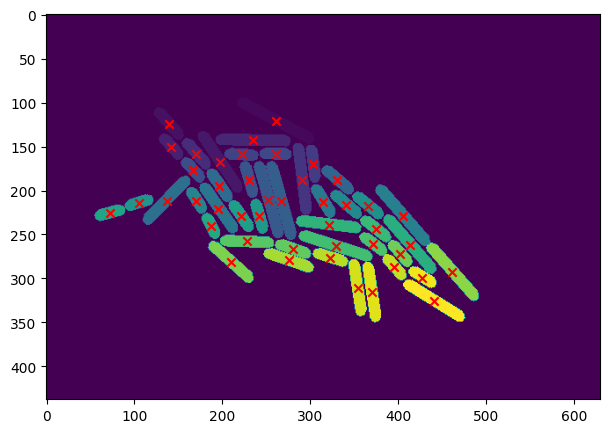

45


In [5]:
plt.imshow(mask)
for k in midpt:
    plt.scatter(midpt[k][1],midpt[k][0],color='red',marker='x')
plt.show()
print(len(midpt))

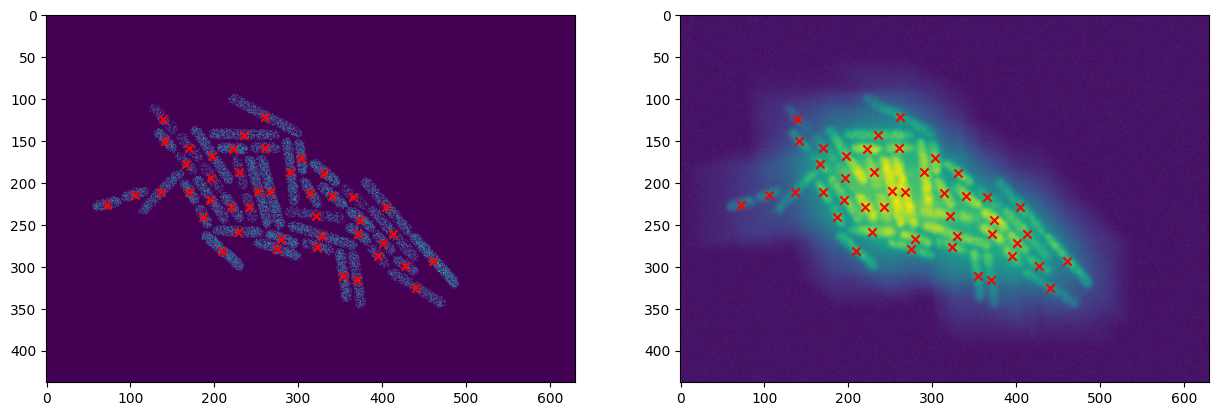

{1.5259022e-05: 2.211001131455509e-05, 3.0518044e-05: 8.719441081796373e-06, 4.5777066e-05: 1.8684516603849372e-05, 6.103609e-05: 2.553550602526081e-05, 7.629511e-05: 2.0864376874298464e-05, 9.155413e-05: 1.1833527182437936e-05, 0.00010681315: 1.7438882163592746e-05, 0.00012207218: 1.9930151044105995e-05, 0.0001373312: 2.397846297494003e-05, 0.00015259022: 1.961874243404184e-05, 0.00016784924: 1.401338745288703e-05, 0.00018310826: 1.1833527182437936e-05, 0.00019836728: 2.397846297494003e-05, 0.0002136263: 2.211001131455509e-05, 0.00022888533: 2.4289871585004183e-05, 0.00024414435: 1.1210709962309624e-05, 0.00025940337: 1.806169938372106e-05, 0.0002746624: 2.2732828534683402e-05, 0.00028992142: 2.304423714474756e-05, 0.00030518044: 1.6816064943464434e-05, 0.00032043946: 2.460128019506834e-05, 0.00033569848: 2.211001131455509e-05, 0.0003509575: 1.0276484132117155e-05, 0.00036621653: 2.8338183515838216e-05, 0.00038147555: 1.7750290773656903e-05, 0.00039673457: 1.899592521391353e-05, 0.000

In [6]:
def AverageFilter(img, x, y):
    sz = [ -3, -2, -1, 0 , 1, 2, 3]
    total = 0
    for i in sz:
        for j in sz:
            total += img[x+i][y+j]
    total/=len(sz)*len(sz)
    return total

originalIntensity = {}
outputIntensity = {}


(originalWidth, originalHeight) = ori.shape
(outputWidth, outputHeight) = out.shape

f, axarr = plt.subplots(1,2)
axarr[0].imshow(ori)
axarr[1].imshow(out)
for k in midpt.keys():
    ratioX = midpt[k][0]/maskWidth
    ratioY = midpt[k][1]/maskHeight

    #Get intensity in original image
    originalX  = int(ratioX*originalWidth)
    originalY = int(ratioY*originalHeight)
    axarr[0].scatter(originalY,originalX,color='red',marker='x')

    originalIntensity[k] = AverageFilter(ori, originalX, originalY)

    #Get intensity in output image
    outputX  = int(ratioX*outputWidth)
    outputY = int(ratioY*outputHeight)
    axarr[1].scatter(outputY,outputX,color='red',marker='x')

    outputIntensity[k] = AverageFilter(out, outputX, outputY)

plt.show()

print(originalIntensity)
print(outputIntensity)
    

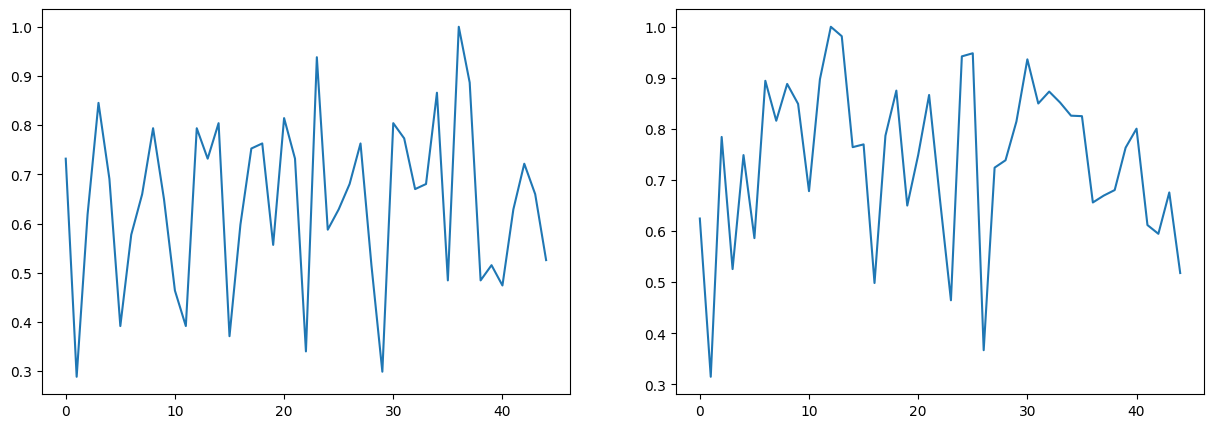

In [7]:
originalIntensityNp = np.asarray([originalIntensity[k] for k in originalIntensity.keys()])
outputIntensityNp = np.asarray([outputIntensity[k] for k in outputIntensity.keys()])

originalIntensityNp = originalIntensityNp / max(originalIntensityNp)
outputIntensityNp = outputIntensityNp / max(outputIntensityNp)

f, axarr = plt.subplots(1,2)
axarr[0].plot(originalIntensityNp)
axarr[1].plot(outputIntensityNp)
plt.show()


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
def euclideanDistance(x,y):
    return ((x[0]-y[0])**2 + (x[1]-y[1])**2)**0.5

N = originalIntensityNp.shape[0]
distanceMatrix= []
intensityMatrix = []
midptKeys = list(midpt.keys())
maskSize = euclideanDistance(mask.shape,(0,0)) 

for idx in range(N):
    current = midpt[midptKeys[idx]]
    current = (int(current[0]),int(current[1]))
    distance = [euclideanDistance(midpt[midptKeys[k]],current)/maskSize for k in range(len(midptKeys))] #Normalise by diagonal length of mask
    intensty = [AverageFilter(out,current[0],current[1])/65535] #Normalise by max intensity
    distanceMatrix.append(torch.tensor(distance))
    intensityMatrix.append(torch.tensor(intensty))

#Include random points
for i in range(10*N):
    x = np.random.randint(0,maskWidth)
    y = np.random.randint(0,maskHeight)
    try:
        distance = [euclideanDistance(midpt[midptKeys[k]],(x,y))/maskSize for k in range(len(midptKeys))]
        intensty = [AverageFilter(out,x,y)/65535]
        distanceMatrix.append(torch.tensor(distance))
        intensityMatrix.append(torch.tensor(intensty))
    except:
        pass

#Convert to tensor
distanceMatrix = torch.stack(distanceMatrix)
intensityMatrix = torch.stack(intensityMatrix)

In [10]:
#Create custom dataset
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, distanceMatrix, intensityMatrix):
        self.distanceMatrix = distanceMatrix
        self.intensityMatrix = intensityMatrix
    def __len__(self):
        return len(self.intensityMatrix)

    def __getitem__(self, idx):
        return (self.distanceMatrix[idx], self.intensityMatrix[idx]) 
dataset = CustomDataset(distanceMatrix, intensityMatrix)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True, num_workers=2)

In [11]:
class Net(nn.Module):
    def __init__(self,N):
        super(Net, self).__init__()
        self.polynomial_degree = 20
        self.polynomial_weights = nn.Linear(self.polynomial_degree,1,bias=False)
        self.polynomial_weights.weight.data[0][0] = -120
        self.actual_intensity = nn.Linear(N,1,bias=False)

    def forward(self, x):
        stack = []
        for i in range (1, self.polynomial_degree+1):
            stack.append(torch.pow(x,2*i))
        x = torch.stack(stack, dim=2)
        x = self.polynomial_weights(x)
        x = x.reshape(x.shape[0],x.shape[1])
        x = torch.exp(x)
        x = self.actual_intensity(x)
        return x

model = Net(N)
model.actual_intensity.weight.data.clamp_(0, 1) #Clamp parameters of last layer
#model.polynomial_weights.bias.data.clamp_(1, 1) #Clamp parameters of const of polynomial

#Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [12]:
#Training loop
for epoch in range(200):  # loop over the dataset multiple times
    print("Epoch: ",epoch+1)
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        model.zero_grad()
        # get the inputs; data is a list of [inputs, labels]
        inputs, outputs = data
        # forward + backward + optimize
        nn_outputs = model(inputs)
        loss = criterion(nn_outputs.float(), outputs.float())
        loss.backward()
        optimizer.step()
        model.actual_intensity.weight.data.clamp_(0, 1) #Clamp parameters of last layer
        #model.polynomial_weights.bias.data.clamp_(1, 1) #Clamp parameters of const of polynomial
        # print statistics
        running_loss += loss.item()
    print("Loss: ",running_loss)
print('Finished Training')


Epoch:  1
Loss:  1.653445199597627
Epoch:  2


Loss:  0.5017553006764501
Epoch:  3
Loss:  0.2922141507733613
Epoch:  4
Loss:  0.24377609288785607
Epoch:  5
Loss:  0.22839805006515235
Epoch:  6
Loss:  0.22100143053103238
Epoch:  7
Loss:  0.21496680681593716
Epoch:  8
Loss:  0.21088166104163975
Epoch:  9
Loss:  0.20670592394890264
Epoch:  10
Loss:  0.20474453328642994
Epoch:  11
Loss:  0.20250358968041837
Epoch:  12
Loss:  0.20126297528622672
Epoch:  13
Loss:  0.2004018798470497
Epoch:  14
Loss:  0.19834880385315046
Epoch:  15
Loss:  0.19623875978868455
Epoch:  16
Loss:  0.19522258988581598
Epoch:  17
Loss:  0.19458571227733046
Epoch:  18
Loss:  0.1935353938024491
Epoch:  19
Loss:  0.1924199730856344
Epoch:  20
Loss:  0.19204011012334377
Epoch:  21
Loss:  0.19139410892967135
Epoch:  22
Loss:  0.1914750561118126
Epoch:  23
Loss:  0.190234832232818
Epoch:  24
Loss:  0.1896076324628666
Epoch:  25
Loss:  0.18895659793633968
Epoch:  26
Loss:  0.1901933616027236
Epoch:  27
Loss:  0.1881250076694414
Epoch:  28
Loss:  0.18781055085128173
Epo

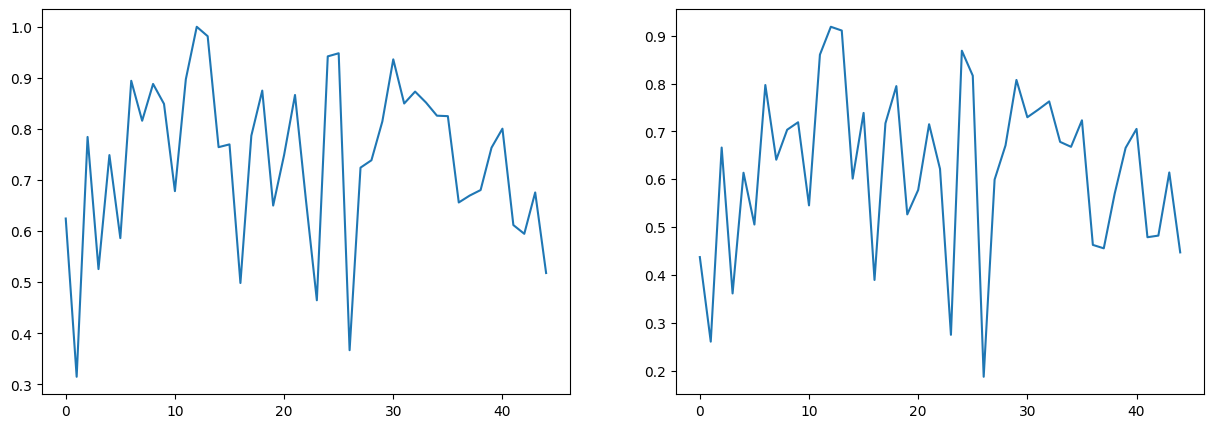

In [13]:
#Check model's output intenstiy against original intensity

modelIntensityNp = model(distanceMatrix[:N]).detach().numpy()
f, axarr = plt.subplots(1,2)
axarr[0].plot(outputIntensityNp)
axarr[1].plot(modelIntensityNp)
plt.show()


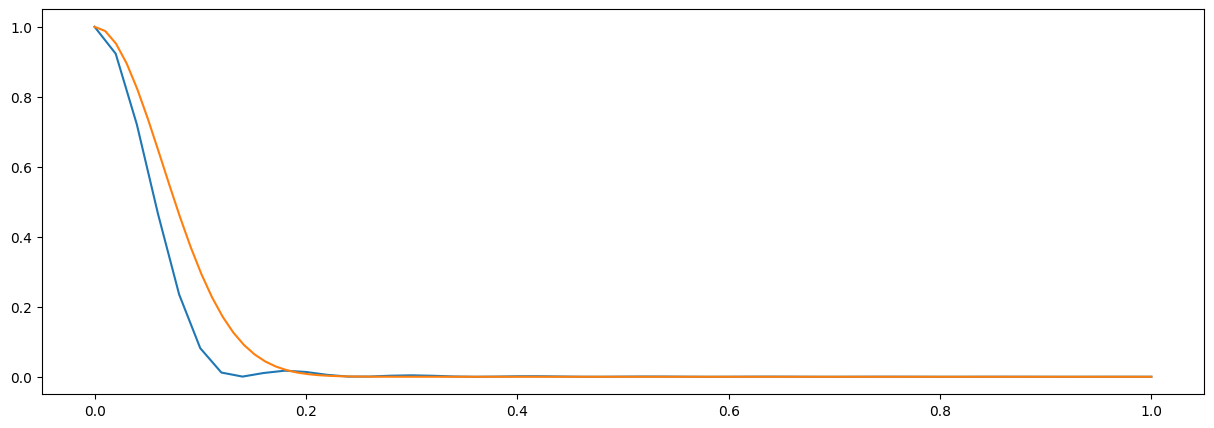

In [14]:
#Checks our model's psf against original psf

with open(FOLDER+'/psf.pkl', 'rb') as file:   
    original_psf = pickle.load(file)

#Normalise x axis of original psf to 1
original_psf_x = np.linspace(0,1,len(original_psf))
original_psf_y = original_psf
plt.plot(original_psf_x,original_psf_y)


coeff = model.polynomial_weights.weight.data[0]
bias = 0
                                          
def getPSF(x, coeff, bias):
    total = bias
    for i in range(len(coeff)):
        total += coeff[i]*(x**(2*(i+1)))
    return torch.exp(total)

new_psf_x = np.linspace(0,1,100)
new_psf_y = getPSF(new_psf_x, coeff, bias)
plt.plot(new_psf_x,new_psf_y.detach().numpy())
plt.show()


tensor(0.1383, dtype=torch.float64)


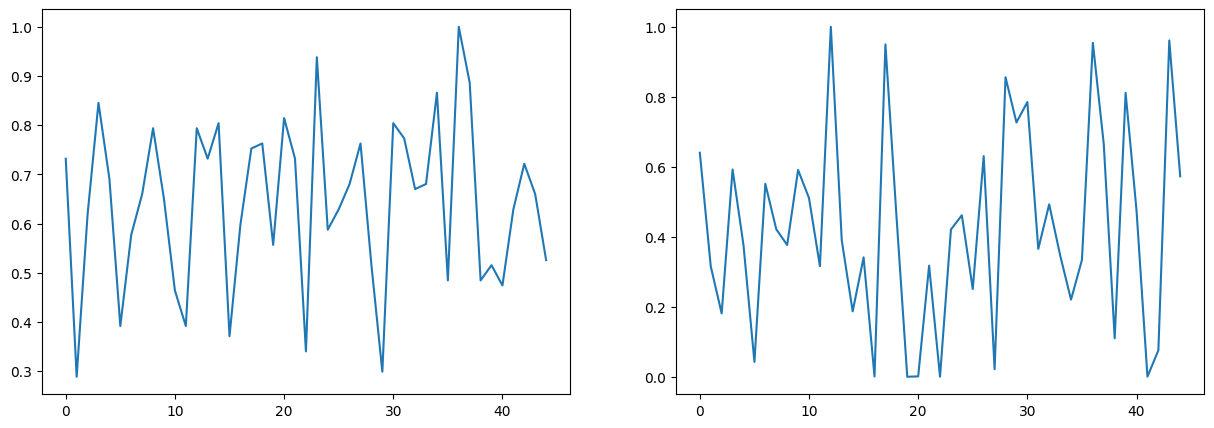

In [15]:
#Checks our model's intensity against original intensity

model_intensity = model.actual_intensity.weight.data.detach().numpy()[0]
model_intensity = model_intensity / max(model_intensity)
print(criterion(torch.tensor(model_intensity),torch.tensor(originalIntensityNp)))
f, axarr = plt.subplots(1,2)
axarr[0].plot(originalIntensityNp)
axarr[1].plot(model_intensity)
plt.show()


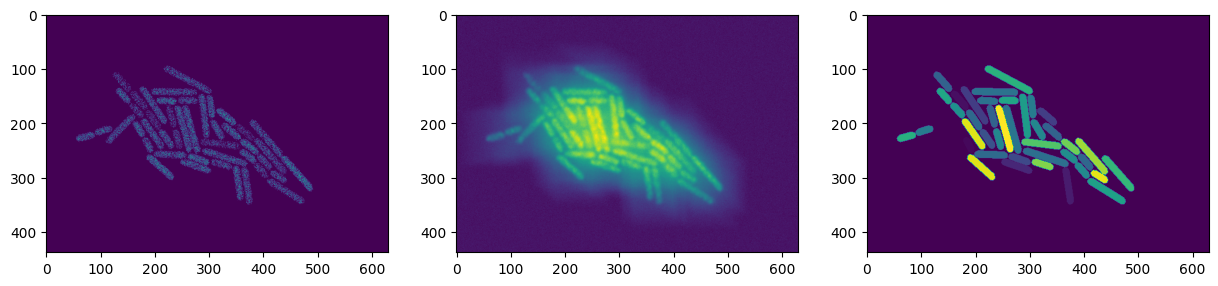

In [17]:
#Recreate original image based off of calculated intensity

customOriginal = mask.copy()
maskToNewIntensity = {}
maskToNewIntensity[0.0] = 0.0
for i in range(len(midptKeys)):
    maskToNewIntensity[midptKeys[i]] = model_intensity[i]
for x in range(len(customOriginal)):
    for y in range(len(customOriginal[0])):
        customOriginal[x][y] = maskToNewIntensity[customOriginal[x][y]]

oriNormalised = np.asanyarray(ori)
oriNormalised = oriNormalised / max(oriNormalised.flatten())

outNormalised = np.asanyarray(out)
outNormalised = outNormalised / max(outNormalised.flatten())

f, axarr = plt.subplots(1,3)
axarr[0].imshow(oriNormalised)
axarr[1].imshow(outNormalised)
axarr[2].imshow(customOriginal)
plt.show()
